<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/OptionVolatilityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Programming for AI')    ## 현재 작업 환경으로 설정한 경로를 입력

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('OptionVolatility.csv', encoding = 'cp949')

In [5]:
data.shape

(167849, 14)

In [6]:
data.info()
# null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167849 entries, 0 to 167848
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Code                167849 non-null  object 
 1   Name                167849 non-null  object 
 2   Date                167849 non-null  int64  
 3   Types               167849 non-null  object 
 4   CallPut             167849 non-null  object 
 5   StrikePrice         167849 non-null  float64
 6   ScaledStrikePrice   167849 non-null  float64
 7   LastPrice           167849 non-null  float64
 8   RemainingDays       167849 non-null  int64  
 9   RiskFreeRate        167849 non-null  float64
 10  OptionDividendRate  167849 non-null  float64
 11  UnderlyingIndex     167849 non-null  float64
 12  VKOSPI              167849 non-null  float64
 13  ImpliedVolatility   167849 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 17.9+ MB


In [7]:
data[['ScaledStrikePrice','LastPrice', 'RemainingDays', 'RiskFreeRate', 'OptionDividendRate', 'UnderlyingIndex','VKOSPI', 'ImpliedVolatility']].describe()

,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,ImpliedVolatility
count,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000
mean,-8.068731,8.044378,78.327276,0.009424,1.164245,305.687886,26.405780,0.314770
std,23.450348,17.453706,126.295958,0.003253,2.103931,49.848465,10.149168,0.206463
min,-118.920000,0.010000,1.000000,0.006300,0.000000,199.280000,12.810000,0.030000
25%,-22.624000,0.230000,21.000000,0.006600,0.000000,278.130000,20.540000,0.191000
50%,-5.252000,1.540000,44.000000,0.007900,0.606689,297.740000,24.150000,0.260000
75%,7.676000,7.800000,78.000000,0.011000,0.840140,318.390000,30.200000,0.381000
max,80.288000,290.200000,1099.000000,0.015300,18.490427,437.300000,69.240000,5.775000


In [8]:
data.columns

Index(['Code', 'Name', 'Date', 'Types', 'CallPut', 'StrikePrice',
       'ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI', 'ImpliedVolatility'],
      dtype='object')

In [9]:
# Feature(X)와 Target(y) 선언하기

X = data[['CallPut','ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate', 'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI']]
y = data[['ImpliedVolatility']]

In [10]:
feature_target = pd.concat([X,y], axis = 1)
feature_target

,CallPut,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,ImpliedVolatility
0,C,-39.180,95.00,10,0.0070,0.000000,415.45,34.16,0.030
1,C,-36.180,88.30,10,0.0070,0.000000,415.45,34.16,0.640
2,C,-36.180,89.20,39,0.0070,0.000000,415.45,34.16,0.400
3,C,-30.180,80.55,130,0.0070,0.606411,415.45,34.16,0.310
4,C,-26.180,52.00,10,0.0070,0.000000,415.45,34.16,0.560
...,...,...,...,...,...,...,...,...,...
167844,P,-0.976,0.70,4,0.0153,0.000000,277.44,13.96,0.143
167845,P,0.024,1.56,4,0.0153,0.000000,277.44,13.96,0.134
167846,P,1.024,2.99,4,0.0153,0.000000,277.44,13.96,0.120
167847,P,2.024,5.25,4,0.0153,0.000000,277.44,13.96,0.150


In [11]:
# categorical data(CallPut) one-hot-encoding 하기
X_features_ohe = pd.get_dummies(X, columns = ['CallPut'])
X_features_ohe

,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,CallPut_C,CallPut_P
0,-39.180,95.00,10,0.0070,0.000000,415.45,34.16,1,0
1,-36.180,88.30,10,0.0070,0.000000,415.45,34.16,1,0
2,-36.180,89.20,39,0.0070,0.000000,415.45,34.16,1,0
3,-30.180,80.55,130,0.0070,0.606411,415.45,34.16,1,0
4,-26.180,52.00,10,0.0070,0.000000,415.45,34.16,1,0
...,...,...,...,...,...,...,...,...,...
167844,-0.976,0.70,4,0.0153,0.000000,277.44,13.96,0,1
167845,0.024,1.56,4,0.0153,0.000000,277.44,13.96,0,1
167846,1.024,2.99,4,0.0153,0.000000,277.44,13.96,0,1
167847,2.024,5.25,4,0.0153,0.000000,277.44,13.96,0,1


## preprocessing

In [12]:
X_features_ohe.columns

Index(['ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI', 'CallPut_C',
       'CallPut_P'],
      dtype='object')

In [13]:
X_features_ohe.describe()


,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,CallPut_C,CallPut_P
count,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000
mean,-8.068731,8.044378,78.327276,0.009424,1.164245,305.687886,26.405780,0.423130,0.576870
std,23.450348,17.453706,126.295958,0.003253,2.103931,49.848465,10.149168,0.494057,0.494057
min,-118.920000,0.010000,1.000000,0.006300,0.000000,199.280000,12.810000,0.000000,0.000000
25%,-22.624000,0.230000,21.000000,0.006600,0.000000,278.130000,20.540000,0.000000,0.000000
50%,-5.252000,1.540000,44.000000,0.007900,0.606689,297.740000,24.150000,0.000000,1.000000
75%,7.676000,7.800000,78.000000,0.011000,0.840140,318.390000,30.200000,1.000000,1.000000
max,80.288000,290.200000,1099.000000,0.015300,18.490427,437.300000,69.240000,1.000000,1.000000


In [ ]:
import seaborn as sns

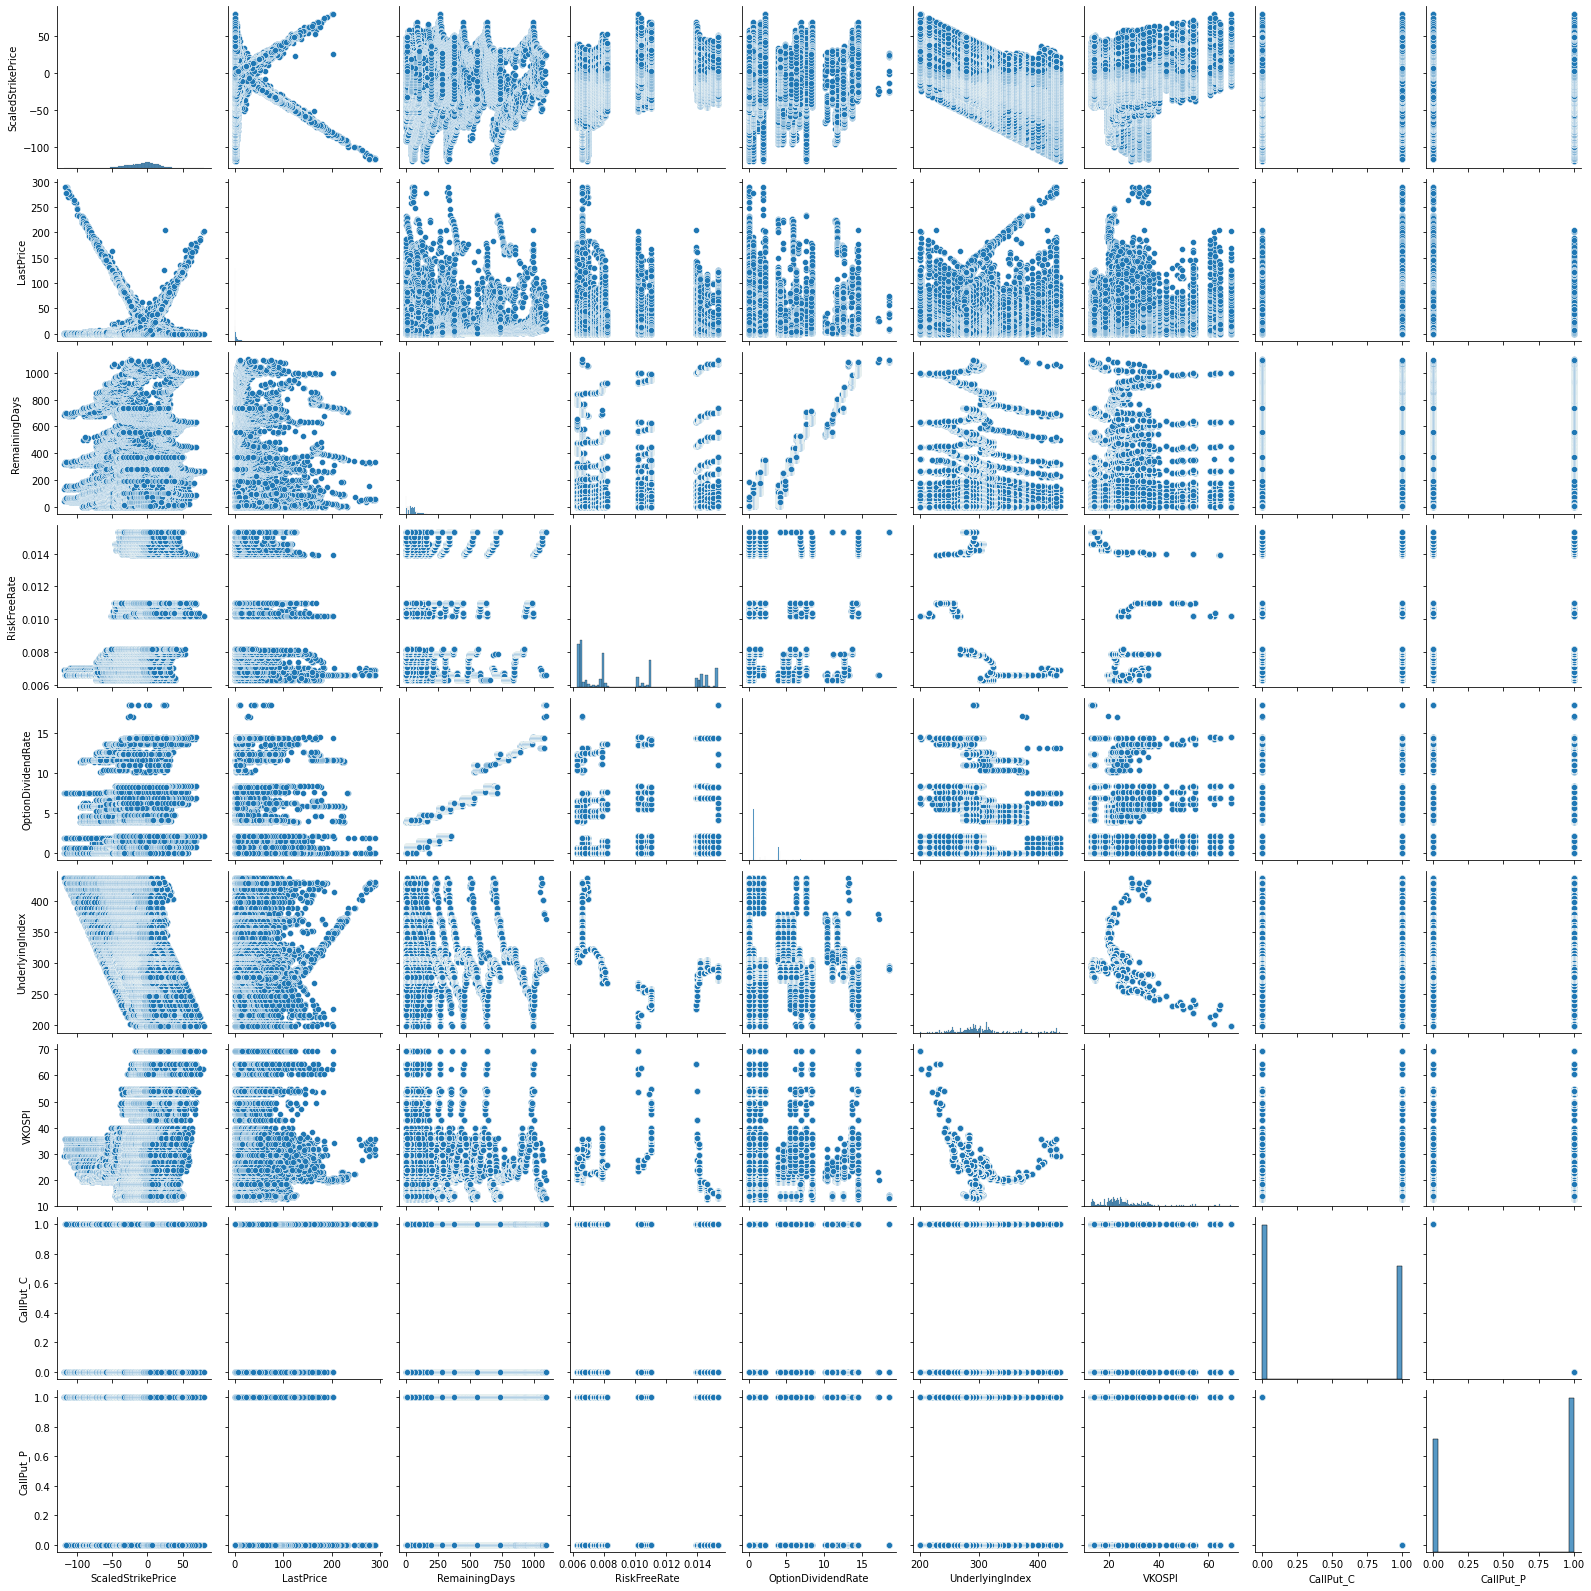

In [ ]:
sns.pairplot(X_features_ohe, diag_kind='hist')

plt.show()

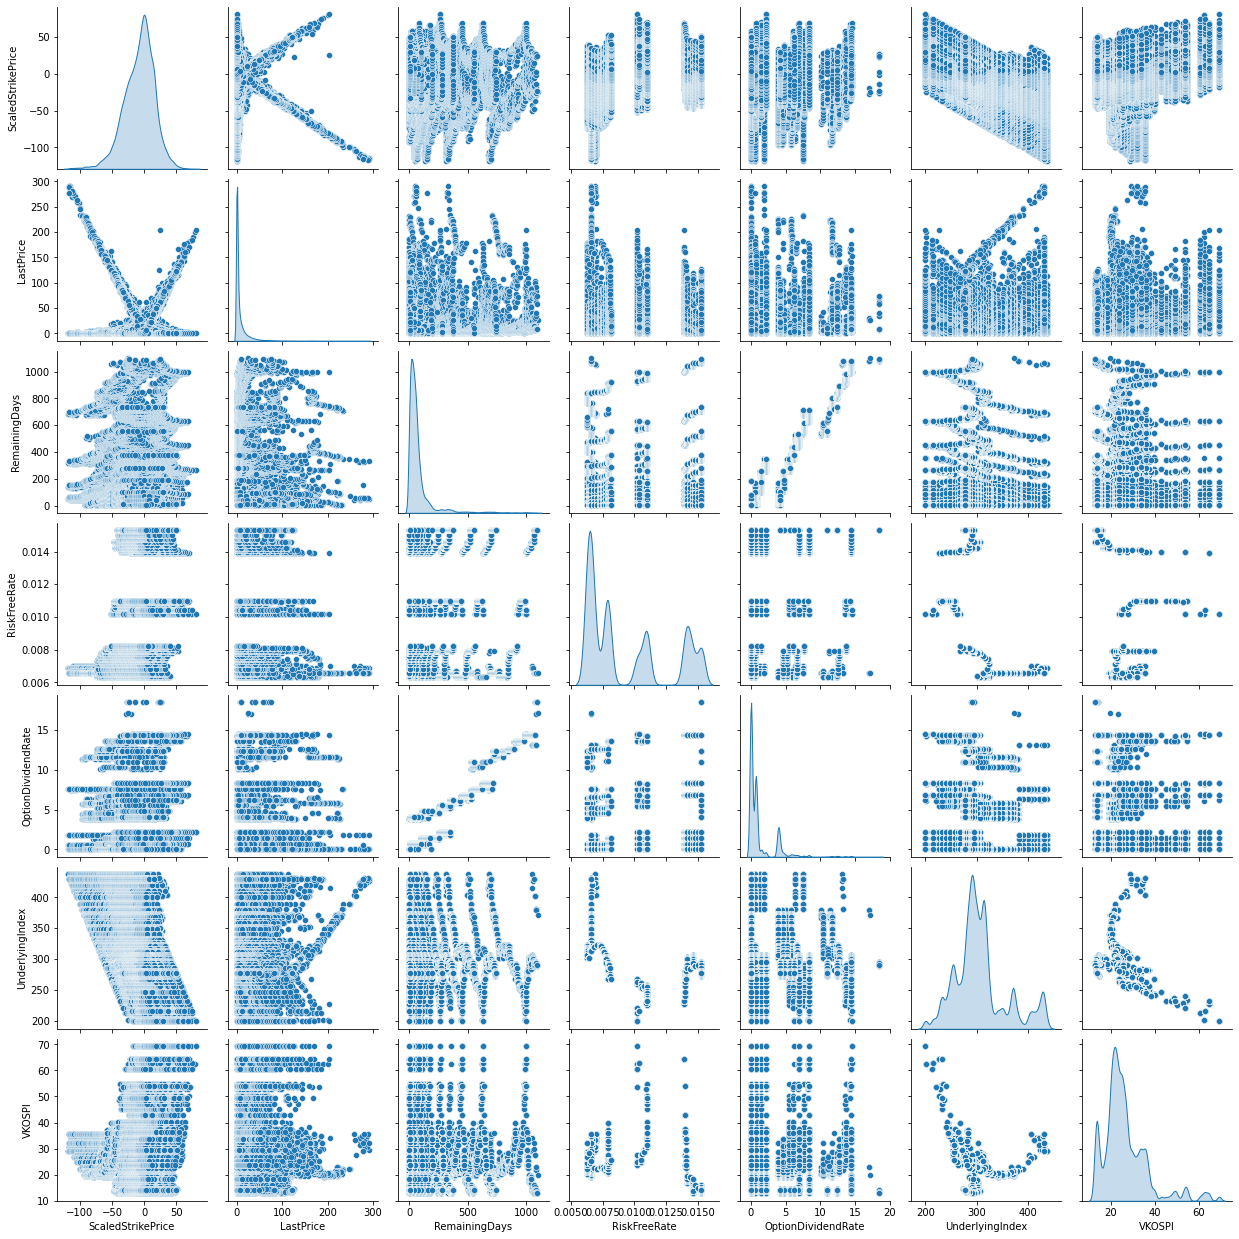

In [ ]:

      
sns.pairplot(X_features_ohe[['ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI']], diag_kind='kde')

plt.show()

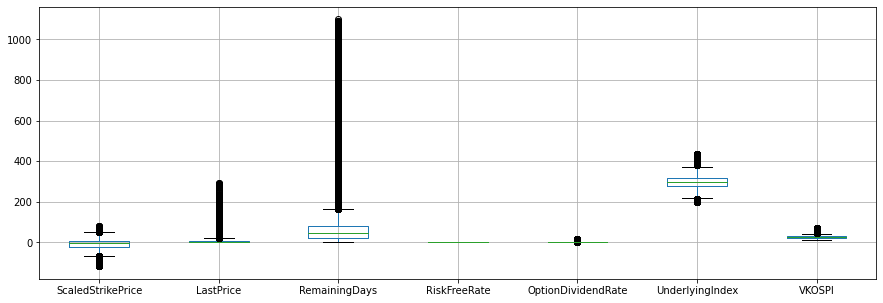

In [ ]:
# Scale 확인하기
X_features_ohe.boxplot(column =['ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI'] , figsize = (15,5))

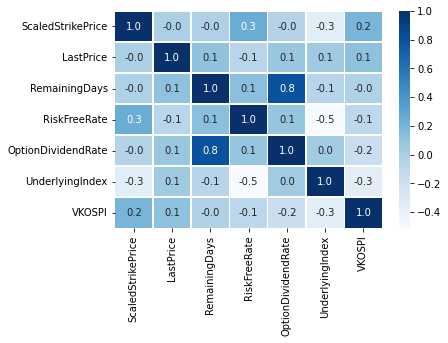

In [ ]:
# corr matrix
corr = X_features_ohe[['ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI']].corr()
sns.heatmap(corr, annot = True, fmt = '.1f', linewidths=.5, cmap = 'Blues')

In [ ]:
# !pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import mglearn 

# features =pd.DataFrame(X_features_ohe, columns=X_features_ohe.columns)
# pd.plotting.scatter_matrix(features, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

TypeError: ignored

In [14]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_features_ohe, y, test_size=0.3, random_state=5)

In [15]:
# 차원 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494, 1), (50355, 1))

In [16]:
# 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


## *Linear Regression 계열



In [ ]:
import statsmodels.api as sm

X = sm.add_constant(train_scaled)
est = sm.OLS(y_train, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ImpliedVolatility   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:35:19   Log-Likelihood:                 50228.
No. Observations:              117494   AIC:                        -1.004e+05
Df Residuals:                  117485   BIC:                        -1.004e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3143      0.000    682.758      0.000       0.313       0.315
x1            -0.1013      0.001   -169.053      0.000      -0.103      -0.100
x2            -0.0063      0.000    -13.248      0.000      -0.007      -0.005
x3            -0.0274      0.001    -34.394      0.000      -0.029      -0.026
x4            -0.0075      0.001    -12.929      0.000      -0.009      -0.006
x5            -0.0092      0.001    -11.479      0.000      -0.011      -0.008
x6            -0.0208      0.001    -33.666      0.000      -0.022      -0.020
x7             0.0847      0.001    156.780      0.000       0.084       0.086
x8            -0.0060      0.000    -21.076      0.000      -0.007      -0.005
x9             0.0060      0.000     21.076      0.000       0.005       0.007
==============================================================================
Omnibus:                   155923.522   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59646931.812
Skew:                           7.352   Prob(JB):                         0.00
Kurtosis:                     112.397   Cond. No.                     3.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
ridge10 = Ridge(alpha=10).fit(train_scaled, y_train)
ridge1 = Ridge(alpha=1).fit(train_scaled, y_train)
ridge01 = Ridge(alpha=0.1).fit(train_scaled, y_train)


In [ ]:
# Grid Search for Ridge
# https://velog.io/@emseoyk/하이퍼파라미터-튜닝
# https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html

from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(estimator = Ridge(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring= 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'alpha': 10}
Ridge(alpha=10)
0.4122798807641138


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025753,0.004444,0.003327,0.000416,0.01,{'alpha': 0.01},0.412356,0.415215,0.421586,0.399962,0.41228,0.007857,7
1,0.029013,0.008857,0.003950,0.000472,0.05,{'alpha': 0.05},0.412356,0.415215,0.421586,0.399962,0.41228,0.007857,6
2,0.025363,0.003781,0.003356,0.000190,0.1,{'alpha': 0.1},0.412356,0.415215,0.421586,0.399962,0.41228,0.007857,5
3,0.030127,0.006864,0.003490,0.000329,0.5,{'alpha': 0.5},0.412356,0.415215,0.421586,0.399962,0.41228,0.007857,4
4,0.022624,0.001413,0.003270,0.000353,1,{'alpha': 1},0.412356,0.415215,0.421586,0.399962,0.41228,0.007857,3
5,0.025935,0.003859,0.003554,0.000324,5,{'alpha': 5},0.412357,0.415215,0.421586,0.399962,0.41228,0.007858,2
6,0.021133,0.002268,0.003189,0.000724,10,{'alpha': 10},0.412357,0.415215,0.421586,0.399961,0.41228,0.007858,1


In [ ]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.399
Test accuracy : 0.395


In [ ]:
# Grid Search for Ridge

grid_search = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(estimator = Lasso(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring= 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'alpha': 0.01}
Lasso(alpha=0.01)
0.39872218614354626


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068547,0.018472,0.005617,0.003157,0.01,{'alpha': 0.01},0.399683,4.022985e-01,4.060155e-01,0.386892,0.398722,0.007191,1
1,0.033260,0.004939,0.003610,0.000457,0.05,{'alpha': 0.05},0.229061,2.282759e-01,2.287164e-01,0.219535,0.226397,0.003972,2
2,0.025687,0.004920,0.006525,0.001794,0.1,{'alpha': 0.1},-0.000022,-2.212574e-07,-3.798636e-07,-0.000022,-0.000011,0.000011,3
3,0.034878,0.012597,0.004601,0.002417,0.5,{'alpha': 0.5},-0.000022,-2.212574e-07,-3.798636e-07,-0.000022,-0.000011,0.000011,3
4,0.022270,0.002109,0.003751,0.000490,1,{'alpha': 1},-0.000022,-2.212574e-07,-3.798636e-07,-0.000022,-0.000011,0.000011,3
5,0.021897,0.001221,0.003564,0.000174,5,{'alpha': 5},-0.000022,-2.212574e-07,-3.798636e-07,-0.000022,-0.000011,0.000011,3
6,0.021168,0.004598,0.002605,0.000468,10,{'alpha': 10},-0.000022,-2.212574e-07,-3.798636e-07,-0.000022,-0.000011,0.000011,3


In [ ]:
lasso10 = Lasso(alpha=10).fit(train_scaled, y_train)
lasso1 = Lasso(alpha=1).fit(train_scaled, y_train)
lasso01 = Lasso(alpha=0.1).fit(train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

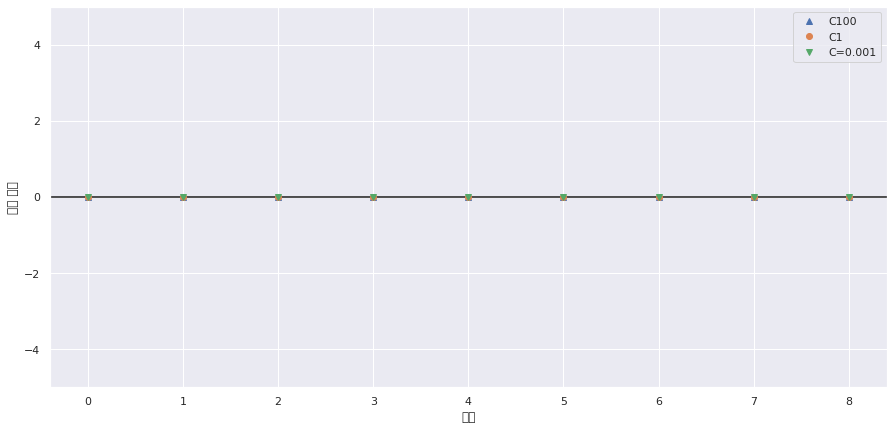

In [ ]:
plt.plot(lasso10.coef_.T, '^', label="C100")
plt.plot(lasso1.coef_.T, 'o', label="C1")
plt.plot(lasso01.coef_.T, 'v', label='C=0.001')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

## * Tree 계열

In [ ]:
# 4 번 모델 Decision Tree(Single Model)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 35, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 1.00000
Test accuracy : 0.955


In [ ]:
# Grid Search for DT

grid_search = {'max_depth': [5, 10, 15, 20, 25, 30, 35]}

grid = GridSearchCV(estimator =DecisionTreeRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2',  n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
{'max_depth': 20}
DecisionTreeRegressor(max_depth=20)
0.9083805562902368


In [ ]:
# 튜닝후 재실행(Decision Tree)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 20, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 0.99703
Test accuracy : 0.955


In [ ]:
dt.get_depth()

20

In [ ]:
dt.get_n_leaves()

41043

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# 5번 모델 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Training accuracy : 0.994
Test accuracy : 0.969


In [ ]:
# Grid Search for Random Forest
# class_weight (불균형(imbalanced) 클래스인 경우)
# max_depth (너무 깊어지면 과적합)
# n_estimators (적을경우 과소적합, 높을경우 긴 학습시간)
# min_samples_leaf (과적합일경우 높임)
# max_features (줄일 수록 다양한 트리생성)
# 탐색 범위 정의
from sklearn.model_selection import GridSearchCV

grid_search = {'max_depth': [5, 10, 15, 20],
               'max_features':[2, 6, 9],
               'n_estimators' : [10, 50, 100]}

grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2',  n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 20, 'max_features': 2, 'n_estimators': 50}
RandomForestRegressor(max_depth=20, max_features=2, n_estimators=50)
0.9418808998635966


In [ ]:
# 파라미터 튜닝하여 재실행(5번 Random Forest Model)
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training accuracy : 0.993
Test accuracy : 0.969


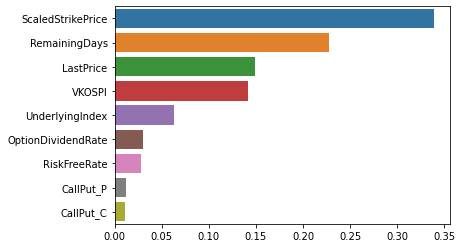

In [ ]:
# Random Forest feature importance 비교
import seaborn as sns
feature_series = pd.Series(data = forest.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 6번 모델 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.872
test Accuracy: 0.879


In [ ]:
# Grid Search for GBR

grid_search = {'max_depth': [3, 5, 10, 20],
               'n_estimators':[20, 50, 100, 200]}

grid = GridSearchCV(estimator =GradientBoostingRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 10, 'n_estimators': 200}
GradientBoostingRegressor(max_depth=10, n_estimators=200)
0.9371624549322948


In [ ]:
# 튜닝한 뒤 재실행(GBR)

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.995
test Accuracy: 0.972


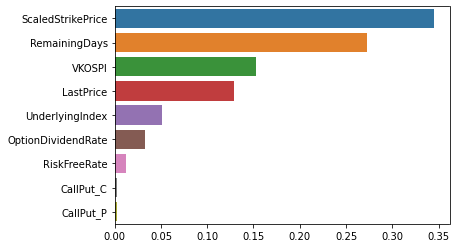

In [ ]:
# feature importance 비교

feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 7번 모델 AdaBoost 모델
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.01,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.555
test Accuracy: 0.561


In [ ]:
# Grid Search for AdaBoost

grid_search = {'n_estimators': [5, 10, 25, 50],
               'learning_rate':[0.01, 0.1, 1]}

grid = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)
grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.1, 'n_estimators': 10}
AdaBoostRegressor(learning_rate=0.1, n_estimators=10)
0.5930116823699447


In [ ]:
# 튜닝한 뒤 재실행(AdaBoost)
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 10,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.555
test Accuracy: 0.564


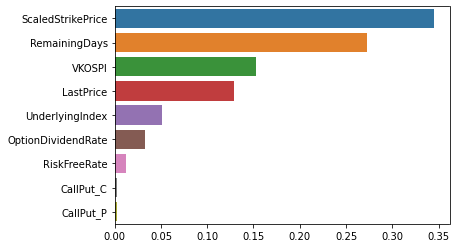

In [ ]:
feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

## SVR, KNN

In [ ]:
# 9번 모델 SVR 모델

from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 10000, C = 0.1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.65
테스트 세트 정확도:0.65


In [ ]:

from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


훈련 세트 정확도: 0.69
테스트 세트 정확도:0.69


In [ ]:
from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 20000, C = 1, epsilon = 0.1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))

In [ ]:
# Grid Search for SVR
# to be edited

from sklearn.svm import SVR
grid_search = {'C': [0.1, 1,  5, 10, 100],
               'epsilon':[1, 2, 5]}

grid = GridSearchCV(estimator =SVR(max_iter = 10000), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 100, 'epsilon': 1}
SVR(C=100, epsilon=1, max_iter=10000)
-3.8472626840807678


In [ ]:
# 튜닝한 뒤 재실행(SVR)


from sklearn.svm import SVR
svr= SVR(kernel = 'rbf', max_iter = 100000, C = 100, epsilon = 1)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: -4.04
테스트 세트 정확도:-3.96


In [ ]:
#10번 모델 K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(weights = 'distance')
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


In [ ]:
# Grid Search for KNN

grid_search = {'n_neighbors': [ 1, 3, 5, 10, 20]}

grid = GridSearchCV(estimator = KNeighborsRegressor(weights = 'distance'), param_grid = grid_search, 
                               cv = 4, verbose= 5, scoring = 'r2', n_jobs = -1)

grid.fit(train_scaled, y_train)

grid_pf = grid.best_estimator_.predict(test_scaled)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_


print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
{'n_neighbors': 5}
KNeighborsRegressor(weights='distance')
0.9264624078784433


In [ ]:
# 튜닝한 뒤 재실행(KNN)
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


##성능비교

In [51]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.412
Test accuracy : 0.410


In [52]:
# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.412
Test accuracy : 0.410


In [54]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.399
Test accuracy : 0.395


In [55]:
# 4번 Decision Tree 모델

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 20, random_state=5)
dt.fit(train_scaled, y_train)

print('Training accuracy : {:.5f}'.format(dt.score(train_scaled, y_train)))
print('Test accuracy : {:.3f}'.format(dt.score(test_scaled, y_test)))

Training accuracy : 0.99703
Test accuracy : 0.955


In [56]:
# 5번 Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

<ipython-input-56-ce312c9ceccc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_scaled, y_train)


Training accuracy : 0.993
Test accuracy : 0.969


In [57]:
# 6번 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.995
test Accuracy: 0.972


In [58]:
# 7번 AdaBoost

from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 10,loss = 'square', random_state = 0)
abr.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.555
test Accuracy: 0.564


In [59]:
# 8번 KNN
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도:0.96


In [60]:
acc_table = pd.DataFrame(columns = ['Algorithm','Train/Test', 'Accuracy'])
acc_table.loc[0] = ['Linear Regression', 'Training Accuracy',lr.score(train_scaled,y_train) ]
acc_table.loc[1] = ['Linear Regression', 'Test Accuracy',lr.score(test_scaled, y_test) ]
acc_table.loc[2] = ['Ridge', 'Training Accuracy',ridge.score(train_scaled,y_train) ]
acc_table.loc[3] = ['Ridge', 'Test Accuracy',ridge.score(test_scaled, y_test) ]
acc_table.loc[4] = ['Lasso', 'Training Accuracy',lasso.score(train_scaled,y_train) ]
acc_table.loc[5] = ['Lasso', 'Test Accuracy',lasso.score(test_scaled, y_test) ]
acc_table.loc[6] = ['Decision Tree', 'Training Accuracy',dt.score(train_scaled,y_train) ]
acc_table.loc[7] = ['Decision Tree', 'Test Accuracy',dt.score(test_scaled, y_test) ]
acc_table.loc[8] = ['Random Forest', 'Training Accuracy',forest.score(train_scaled,y_train) ]
acc_table.loc[9] = ['Random Forest', 'Test Accuracy',forest.score(test_scaled, y_test) ]
acc_table.loc[10] = ['GBM', 'Training Accuracy',gbr.score(train_scaled,y_train) ]
acc_table.loc[11] = ['GBM', 'Test Accuracy',gbr.score(test_scaled, y_test) ]
acc_table.loc[12] = ['AdaBoost', 'Training Accuracy',abr.score(train_scaled,y_train) ]
acc_table.loc[13] = ['AdaBoost', 'Test Accuracy',abr.score(test_scaled, y_test) ]
#acc_table.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(train_scaled,y_train) ]
#acc_table.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(test_scaled, y_test) ]
#acc_table.loc[16] = ['SVR', 'Training Accuracy', svr.score(train_scaled,y_train) ]
#acc_table.loc[17] = ['SVR', 'Test Accuracy', svr.score(test_scaled, y_test) ]
acc_table.loc[14] = ['KNN', 'Training Accuracy', knn.score(train_scaled,y_train) ]
acc_table.loc[15] = ['KNN', 'Test Accuracy', knn.score(test_scaled, y_test) ]


acc_table

,Algorithm,Train/Test,Accuracy
0,Linear Regression,Training Accuracy,0.412282
1,Linear Regression,Test Accuracy,0.409878
2,Ridge,Training Accuracy,0.412282
3,Ridge,Test Accuracy,0.409877
4,Lasso,Training Accuracy,0.398682
5,Lasso,Test Accuracy,0.395246
6,Decision Tree,Training Accuracy,0.997034
7,Decision Tree,Test Accuracy,0.955101
8,Random Forest,Training Accuracy,0.993095
9,Random Forest,Test Accuracy,0.969079


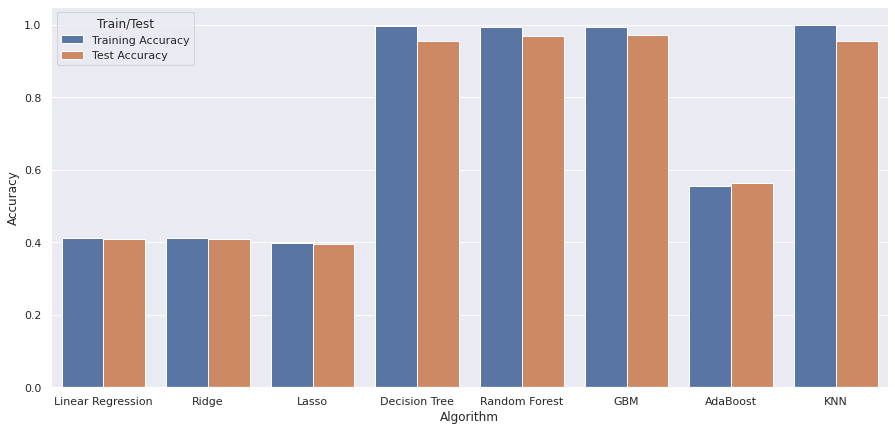

In [61]:
sns.set(rc = {'figure.figsize':(15,7)})
ax = sns.barplot(data = acc_table, x = 'Algorithm', y = 'Accuracy', hue = 'Train/Test')

In [62]:
acc_table2 = pd.pivot_table(acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'Accuracy'])
acc_table2

Accuracy                                              \
Algorithm          AdaBoost Decision Tree       GBM       KNN     Lasso   
Train/Test                                                                
Test Accuracy      0.563590      0.955101  0.971537  0.956136  0.395246   
Training Accuracy  0.554932      0.997034  0.995089  1.000000  0.398682   

                                                             
Algorithm         Linear Regression Random Forest     Ridge  
Train/Test                                                   
Test Accuracy              0.409878      0.969079  0.409877  
Training Accuracy          0.412282      0.993095  0.412282

** DNN 추가

In [63]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.0001
weight_decay: 0.0001
num_epochs: 30000
training_r2_score: 0.9485245464510521
test_r2_score: 0.9453635202318369
Large10NN(
  (linear1): Linear(in_features=9, out_features=128, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=128, bias=True)
  (linear7): Linear(in_features=128, out_features=128, bias=True)
  (linear8): Linear(in_features=128, out_features=128, bias=True)
  (linear9): Linear(in_features=128, out_features=128, bias=True)
  (linear10): Linear(in_features=128, out_features=1, bias=True)
)


In [64]:
acc_table.loc[16] = ['DNN', 'Training Accuracy', train_score ]
acc_table.loc[17] = ['DNN', 'Test Accuracy', test_score ]


acc_table

,Algorithm,Train/Test,Accuracy
0,Linear Regression,Training Accuracy,0.412282
1,Linear Regression,Test Accuracy,0.409878
2,Ridge,Training Accuracy,0.412282
3,Ridge,Test Accuracy,0.409877
4,Lasso,Training Accuracy,0.398682
5,Lasso,Test Accuracy,0.395246
6,Decision Tree,Training Accuracy,0.997034
7,Decision Tree,Test Accuracy,0.955101
8,Random Forest,Training Accuracy,0.993095
9,Random Forest,Test Accuracy,0.969079


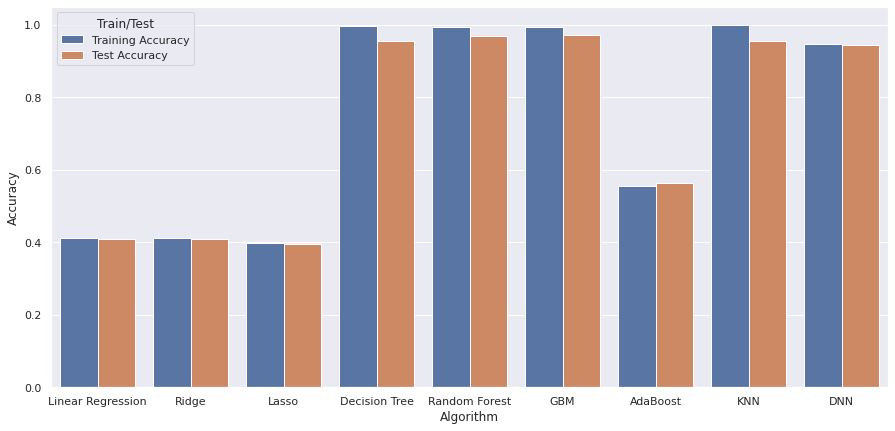

In [65]:
sns.set(rc = {'figure.figsize':(15,7)})
ax = sns.barplot(data = acc_table, x = 'Algorithm', y = 'Accuracy', hue = 'Train/Test')

In [66]:
acc_table2 = pd.pivot_table(acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'Accuracy'])
acc_table2

Accuracy                                              \
Algorithm          AdaBoost       DNN Decision Tree       GBM       KNN   
Train/Test                                                                
Test Accuracy      0.563590  0.945364      0.955101  0.971537  0.956136   
Training Accuracy  0.554932  0.948525      0.997034  0.995089  1.000000   

                                                                       
Algorithm             Lasso Linear Regression Random Forest     Ridge  
Train/Test                                                             
Test Accuracy      0.395246          0.409878      0.969079  0.409877  
Training Accuracy  0.398682          0.412282      0.993095  0.412282

## PCA


In [ ]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()
ss.fit(X_features_ohe)
X_scaled = ss.transform(X_features_ohe)

pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
df_pca = pd.DataFrame(pca_data)
df_pca.columns = ['PC'+ str(i) for i in range(1,10)]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.436696,-0.673416,3.654752,3.093123,3.284432,-0.659482,1.036261,-0.171266,-1.736325e-16
1,0.467310,-0.713704,3.541771,2.865997,2.979109,-0.608871,1.066116,-0.159443,-1.736325e-16
2,0.471572,-0.552815,3.563906,2.925306,2.977594,-0.609215,1.072747,0.000014,-1.736325e-16
3,0.544156,0.077991,3.467736,2.723706,2.396791,-0.477114,1.130396,0.319611,-6.261015e-17
4,0.502962,-0.928085,2.954006,1.653405,1.362111,-0.562070,1.222838,-0.105829,-1.736325e-16
...,...,...,...,...,...,...,...,...,...
167844,-0.488737,-0.204609,-1.740281,-1.545128,1.218467,0.515993,0.154316,0.058511,1.563584e-16
167845,-0.463827,-0.200301,-1.731173,-1.519951,1.249416,0.559863,0.151598,0.059306,1.563584e-16
167846,-0.436208,-0.192725,-1.713446,-1.476183,1.304821,0.608708,0.146545,0.059521,1.563584e-16
167847,-0.404643,-0.180389,-1.683170,-1.405346,1.395839,0.664797,0.138093,0.058891,1.563584e-16


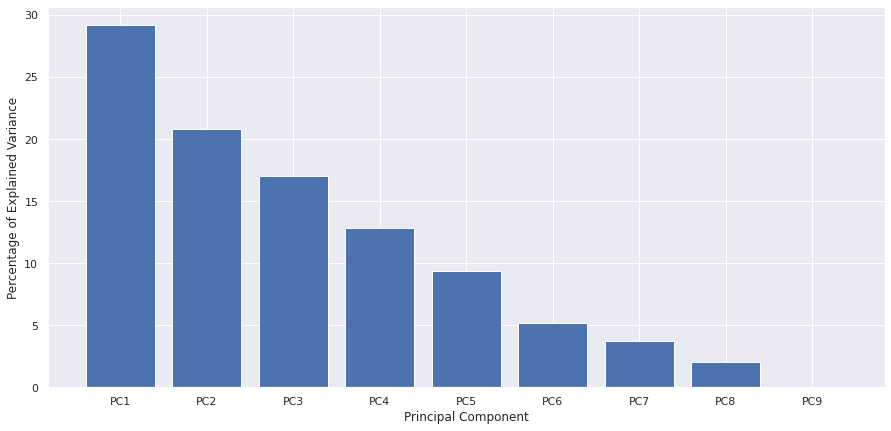

In [ ]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [ ]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test =  train_test_split(df_pca[['PC1', 'PC2', 'PC3']], y, test_size=0.3, random_state=5)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494, 1), (50355, 1))

In [ ]:
X_pca_train.shape, X_pca_test.shape, y_pca_train.shape, y_pca_test.shape

((117494, 3), (50355, 3), (117494, 1), (50355, 1))

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,max_depth = 20,max_features = 3, n_jobs = -1,oob_score = True, random_state = 5)
gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, max_features = 3, random_state = 0)


In [ ]:
lr.fit(X_pca_train, y_pca_train)
ridge.fit(X_pca_train, y_pca_train)
lasso.fit(X_pca_train, y_pca_train)
dt.fit(X_pca_train, y_pca_train)
forest.fit(X_pca_train, y_pca_train)
gbr.fit(X_pca_train, y_pca_train)
abr.fit(X_pca_train, y_pca_train)
#bagging.fit(X_pca_train, y_pca_train)
#svr.fit(X_pca_train, y_pca_train)
knn.fit(X_pca_train, y_pca_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor(weights='distance')

In [ ]:
PCA_acc_table = pd.DataFrame(columns = ['Algorithm','Train/Test', 'Accuracy'])
PCA_acc_table.loc[0] = ['Linear Regression', 'Training Accuracy',lr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[1] = ['Linear Regression', 'Test Accuracy',lr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[2] = ['Ridge', 'Training Accuracy',ridge.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[3] = ['Ridge', 'Test Accuracy',ridge.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[4] = ['Lasso', 'Training Accuracy',lasso.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[5] = ['Lasso', 'Test Accuracy',lasso.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[6] = ['Decision Tree', 'Training Accuracy',dt.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[7] = ['Decision Tree', 'Test Accuracy',dt.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[8] = ['Random Forest', 'Training Accuracy',forest.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[9] = ['Random Forest', 'Test Accuracy',forest.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[10] = ['GBR', 'Training Accuracy',gbr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[11] = ['GBR', 'Test Accuracy',gbr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[12] = ['AdaBoost', 'Training Accuracy',abr.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[13] = ['AdaBoost', 'Test Accuracy',abr.score(X_pca_test, y_pca_test) ]
#PCA_acc_table.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(X_pca_train, y_pca_train) ]
#PCA_acc_table.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(X_pca_test, y_pca_test) ]
#PCA_acc_table.loc[16] = ['SVR', 'Training Accuracy',svr.score(X_pca_train, y_pca_train) ]
#PCA_acc_table.loc[17] = ['SVR', 'Test Accuracy',svr.score(X_pca_test, y_pca_test) ]
PCA_acc_table.loc[14] = ['KNN', 'Training Accuracy',knn.score(X_pca_train, y_pca_train) ]
PCA_acc_table.loc[15] = ['KNN', 'Test Accuracy',knn.score(X_pca_test, y_pca_test) ]
PCA_acc_table

,Algorithm,Train/Test,Accuracy
0,Linear Regression,Training Accuracy,0.172089
1,Linear Regression,Test Accuracy,0.173283
2,Ridge,Training Accuracy,0.172089
3,Ridge,Test Accuracy,0.173283
4,Lasso,Training Accuracy,0.168380
5,Lasso,Test Accuracy,0.168764
6,Decision Tree,Training Accuracy,0.968946
7,Decision Tree,Test Accuracy,0.888637
8,Random Forest,Training Accuracy,0.968533
9,Random Forest,Test Accuracy,0.917513


In [ ]:
PCA_acc_table2 = pd.pivot_table(PCA_acc_table, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'Accuracy'])
PCA_acc_table2

Accuracy                                              \
Algorithm          AdaBoost Decision Tree       GBR       KNN     Lasso   
Train/Test                                                                
Test Accuracy      0.332842      0.888637  0.891028  0.935497  0.168764   
Training Accuracy  0.331426      0.968946  0.932335  1.000000  0.168380   

                                                             
Algorithm         Linear Regression Random Forest     Ridge  
Train/Test                                                   
Test Accuracy              0.173283      0.917513  0.173283  
Training Accuracy          0.172089      0.968533  0.172089

In [ ]:
acc_table2

Accuracy                                              \
Algorithm          AdaBoost Decision Tree       GBM       KNN     Lasso   
Train/Test                                                                
Test Accuracy      0.563590      0.955101  0.971537  0.956136  0.395246   
Training Accuracy  0.554932      0.997034  0.995089  1.000000  0.398682   

                                                             
Algorithm         Linear Regression Random Forest     Ridge  
Train/Test                                                   
Test Accuracy              0.409878      0.969079  0.409877  
Training Accuracy          0.412282      0.993095  0.412282

## *정규화 안하고 돌려보기


In [ ]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 20, random_state=5)
dt.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,max_depth = 20, max_features = 6, n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(X_train, y_train)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss= 'squared_error', max_depth = 10, n_estimators = 200, random_state = 0)
gbr.fit(X_train, y_train)

# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 10,loss = 'square', random_state = 0)
abr.fit(X_train, y_train)

# Bagging
#from sklearn.ensemble import BaggingRegressor

#bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators =100, max_features = 9, max_samples = 10, oob_score = True, n_jobs = -1, random_state = 0 )
#bagging.fit(X_train, y_train)

#SVR
#from sklearn.svm import SVR
#svr= SVR(kernel = 'rbf', max_iter = 10000, C = 5, epsilon = 0.1)
#svr.fit(X_train, y_train)

# KNN
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(weights = 'distance', n_neighbors= 5)
knn.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor(weights='distance')

In [ ]:
acc_table_no_std = pd.DataFrame(columns = ['Algorithm','Train/Test', 'Accuracy'])
acc_table_no_std.loc[0] = ['Linear Regression', 'Training Accuracy',lr.score(X_train, y_train) ]
acc_table_no_std.loc[1] = ['Linear Regression', 'Test Accuracy',lr.score(X_test, y_test) ]
acc_table_no_std.loc[2] = ['Ridge', 'Training Accuracy',ridge.score(X_train, y_train) ]
acc_table_no_std.loc[3] = ['Ridge', 'Test Accuracy',ridge.score(X_test, y_test) ]
acc_table_no_std.loc[4] = ['Lasso', 'Training Accuracy',lasso.score(X_train, y_train) ]
acc_table_no_std.loc[5] = ['Lasso', 'Test Accuracy',lasso.score(X_test, y_test) ]
acc_table_no_std.loc[6] = ['Decision Tree', 'Training Accuracy',dt.score(X_train, y_train) ]
acc_table_no_std.loc[7] = ['Decision Tree', 'Test Accuracy',dt.score(X_test, y_test) ]
acc_table_no_std.loc[8] = ['Random Forest', 'Training Accuracy',forest.score(X_train, y_train) ]
acc_table_no_std.loc[9] = ['Random Forest', 'Test Accuracy',forest.score(X_test, y_test) ]
acc_table_no_std.loc[10] = ['GBM', 'Training Accuracy',gbr.score(X_train, y_train) ]
acc_table_no_std.loc[11] = ['GBM', 'Test Accuracy',gbr.score(X_test, y_test) ]
acc_table_no_std.loc[12] = ['AdaBoost', 'Training Accuracy',abr.score(X_train, y_train) ]
acc_table_no_std.loc[13] = ['AdaBoost', 'Test Accuracy',abr.score(X_test, y_test) ]
#acc_table_no_std.loc[14] = ['Bagging', 'Training Accuracy',bagging.score(X_train, y_train) ]
#acc_table_no_std.loc[15] = ['Bagging', 'Test Accuracy',bagging.score(X_test, y_test) ]
#acc_table_no_std.loc[16] = ['SVR', 'Training Accuracy', svr.score(X_train, y_train) ]
#acc_table_no_std.loc[17] = ['SVR', 'Test Accuracy', svr.score(X_test, y_test) ]
acc_table_no_std.loc[14] = ['KNN', 'Training Accuracy', knn.score(X_train, y_train) ]
acc_table_no_std.loc[15] = ['KNN', 'Test Accuracy', knn.score(X_test, y_test) ]


acc_table_no_std

,Algorithm,Train/Test,Accuracy
0,Linear Regression,Training Accuracy,0.412282
1,Linear Regression,Test Accuracy,0.409878
2,Ridge,Training Accuracy,0.411564
3,Ridge,Test Accuracy,0.409318
4,Lasso,Training Accuracy,0.408653
5,Lasso,Test Accuracy,0.406482
6,Decision Tree,Training Accuracy,0.997034
7,Decision Tree,Test Accuracy,0.954573
8,Random Forest,Training Accuracy,0.993070
9,Random Forest,Test Accuracy,0.969012


In [ ]:
acc_table_no_std2 = pd.pivot_table(acc_table_no_std, index = ['Train/Test'], columns = ['Algorithm'], values = [ 'Accuracy'])
acc_table_no_std2

Accuracy                                              \
Algorithm          AdaBoost Decision Tree       GBM       KNN     Lasso   
Train/Test                                                                
Test Accuracy      0.563590      0.954573  0.971503  0.967094  0.406482   
Training Accuracy  0.554932      0.997034  0.995089  1.000000  0.408653   

                                                             
Algorithm         Linear Regression Random Forest     Ridge  
Train/Test                                                   
Test Accuracy              0.409878      0.969012  0.409318  
Training Accuracy          0.412282      0.993070  0.411564

## Pytorch를 이용한 딥러닝 학습

In [17]:
import torch
import torch.nn as nn

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
import random
random.seed(100)
torch.manual_seed(100)
if device == 'cuda':
    torch.cuda.manual_seed_all(100)

In [19]:
train_scaled_tensor = torch.from_numpy(train_scaled)
test_scaled_tensor = torch.from_numpy(test_scaled)
y_train_tensor = torch.from_numpy(y_train.values)
y_test_tensor = torch.from_numpy(y_test.values)


In [20]:
train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
y_test_tensor =  torch.tensor(y_test_tensor, dtype = torch.float32)


<ipython-input-20-08aea4418fc3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
<ipython-input-20-08aea4418fc3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
<ipython-input-20-08aea4418fc3>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
<ipython-input-20-08aea4418fc3>:4: UserWarning: To copy construct from a ten

In [21]:
train_scaled_tensor = train_scaled_tensor.to(device)
test_scaled_tensor = test_scaled_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor =  y_test_tensor.to(device)


In [46]:
class Large10NN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,128)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(128,128)
    self.linear3 = nn.Linear(128,128)
    self.linear4 = nn.Linear(128,128)
    self.linear5 = nn.Linear(128,128)
    self.linear6 = nn.Linear(128,128)
    self.linear7 = nn.Linear(128,128)
    self.linear8 = nn.Linear(128,128)
    self.linear9 = nn.Linear(128,128)
    self.linear10 = nn.Linear(128,1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    x = self.activation(x)
    x = self.linear4(x)
    x = self.activation(x)
    x = self.linear5(x)
    x = self.activation(x)
    x = self.linear6(x)
    x = self.activation(x)
    x = self.linear7(x)
    x = self.activation(x)
    x = self.linear8(x)
    x = self.activation(x)
    x = self.linear9(x)
    x = self.activation(x)
    x = self.linear10(x)
    return x
  

In [47]:
model = Large10NN().to(device)

learning_rate = 0.0001
weight_decay = 0.0001

loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)

In [48]:

num_epochs = 30000

training_loss, test_loss = [], []

for epoch in range(num_epochs):
  y_pred = model(train_scaled_tensor)
  loss= loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss_test = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss_test.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

Epoch 25/30000, Loss=0.1567 
Epoch 50/30000, Loss=0.1099 
Epoch 75/30000, Loss=0.0374 
Epoch 100/30000, Loss=0.0311 
Epoch 125/30000, Loss=0.0257 
Epoch 150/30000, Loss=0.0226 
Epoch 175/30000, Loss=0.0210 
Epoch 200/30000, Loss=0.0199 
Epoch 225/30000, Loss=0.0191 
Epoch 250/30000, Loss=0.0183 
Epoch 275/30000, Loss=0.0174 
Epoch 300/30000, Loss=0.0166 
Epoch 325/30000, Loss=0.0156 
Epoch 350/30000, Loss=0.0144 
Epoch 375/30000, Loss=0.0128 
Epoch 400/30000, Loss=0.0109 
Epoch 425/30000, Loss=0.0090 
Epoch 450/30000, Loss=0.0076 
Epoch 475/30000, Loss=0.0066 
Epoch 500/30000, Loss=0.0060 
Epoch 525/30000, Loss=0.0056 
Epoch 550/30000, Loss=0.0053 
Epoch 575/30000, Loss=0.0051 
Epoch 600/30000, Loss=0.0048 
Epoch 625/30000, Loss=0.0047 
Epoch 650/30000, Loss=0.0045 
Epoch 675/30000, Loss=0.0044 
Epoch 700/30000, Loss=0.0043 
Epoch 725/30000, Loss=0.0042 
Epoch 750/30000, Loss=0.0042 
Epoch 775/30000, Loss=0.0041 
Epoch 800/30000, Loss=0.0041 
Epoch 825/30000, Loss=0.0040 
Epoch 850/300

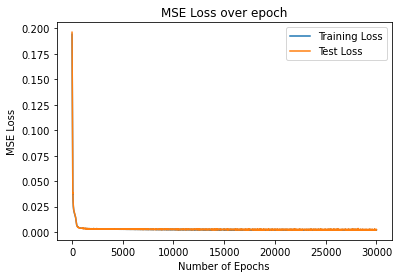

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,num_epochs,num_epochs)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [50]:
# 128nodes Model 

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.0001
weight_decay: 0.0001
num_epochs: 30000
training_r2_score: 0.9485245464510521
test_r2_score: 0.9453635202318369
Large10NN(
  (linear1): Linear(in_features=9, out_features=128, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=128, bias=True)
  (linear7): Linear(in_features=128, out_features=128, bias=True)
  (linear8): Linear(in_features=128, out_features=128, bias=True)
  (linear9): Linear(in_features=128, out_features=128, bias=True)
  (linear10): Linear(in_features=128, out_features=1, bias=True)
)


** 위에 결과로 쓰기!

In [ ]:
# 128nodes Model 
num_epochs = 2000

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.001
weight_decay: 0.001
num_epochs: 2000
training_r2_score: 0.9296932762833704
test_r2_score: 0.9219867795570643
Large128NN_BN(
  (linear1): Linear(in_features=9, out_features=128, bias=True)
  (activation): ReLU()
  (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=128, bias=True)
  (linear7): Linear(in_features=128, out_features=128, bias=True)
  (linear8): Linear(in_features=128, out_features=128, bias=True)
  (linear9): Linear(in_features=128, out_features=128, bias=True)
  (linear10): Linear(in_features=128, out_features=1, bias=True)
)


## 요걸로 채택

In [ ]:
num_epochs = 2000

training_loss, test_loss = [], []

for epoch in range(num_epochs):
  y_pred = model(train_scaled_tensor)
  loss= loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss_test = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss_test.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

Epoch 25/2000, Loss=0.0014 
Epoch 50/2000, Loss=0.0016 
Epoch 75/2000, Loss=0.0014 
Epoch 100/2000, Loss=0.0014 
Epoch 125/2000, Loss=0.0014 
Epoch 150/2000, Loss=0.0018 
Epoch 175/2000, Loss=0.0013 
Epoch 200/2000, Loss=0.0013 
Epoch 225/2000, Loss=0.0015 
Epoch 250/2000, Loss=0.0012 
Epoch 275/2000, Loss=0.0014 
Epoch 300/2000, Loss=0.0014 
Epoch 325/2000, Loss=0.0012 
Epoch 350/2000, Loss=0.0011 
Epoch 375/2000, Loss=0.0011 
Epoch 400/2000, Loss=0.0015 
Epoch 425/2000, Loss=0.0015 
Epoch 450/2000, Loss=0.0010 
Epoch 475/2000, Loss=0.0016 
Epoch 500/2000, Loss=0.0012 
Epoch 525/2000, Loss=0.0011 
Epoch 550/2000, Loss=0.0014 
Epoch 575/2000, Loss=0.0011 
Epoch 600/2000, Loss=0.0014 
Epoch 625/2000, Loss=0.0012 
Epoch 650/2000, Loss=0.0019 
Epoch 675/2000, Loss=0.0014 
Epoch 700/2000, Loss=0.0010 
Epoch 725/2000, Loss=0.0016 
Epoch 750/2000, Loss=0.0024 
Epoch 775/2000, Loss=0.0015 
Epoch 800/2000, Loss=0.0021 
Epoch 825/2000, Loss=0.0018 
Epoch 850/2000, Loss=0.0014 
Epoch 875/2000, L

In [ ]:
# 128nodes Model 

from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

NameError: ignored

In [ ]:
torch.save(model, '/content/gdrive/MyDrive/Colab Notebooks/Programming for AI/model.pth')

In [ ]:
model = torch.load('/content/gdrive/MyDrive/Colab Notebooks/Programming for AI/model.pth')

In [ ]:
# 64nodes
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.cpu().detach(), y_pred.cpu().detach())
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.cpu().detach(), y_pred2.cpu().detach())

print(f'learning_rate: {learning_rate}')
print(f'weight_decay: {weight_decay}')
print(f'num_epochs: {num_epochs}')
print(f'training_r2_score: {train_score}')
print(f'test_r2_score: {test_score}')
print(model)

learning_rate: 0.01
weight_decay: 0.001
num_epochs: 10000
training_r2_score: 0.8801798026426271
test_r2_score: 0.8903321926760964
Large64NN_BN(
  (linear1): Linear(in_features=9, out_features=64, bias=True)
  (activation): ReLU()
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=64, bias=True)
  (linear8): Linear(in_features=64, out_features=64, bias=True)
  (linear9): Linear(in_features=64, out_features=64, bias=True)
  (linear10): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
# large, 0.01, 2000epochs
training_r2_score: 0.8952423908491325
test_r2_score: 0.9202448952129847

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(5000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/5000, Loss={loss.item():.4f} ')

Epoch 25/5000, Loss=0.0442 
Epoch 50/5000, Loss=0.0213 
Epoch 75/5000, Loss=0.0179 
Epoch 100/5000, Loss=0.0152 
Epoch 125/5000, Loss=0.0292 
Epoch 150/5000, Loss=0.0115 
Epoch 175/5000, Loss=0.0099 
Epoch 200/5000, Loss=0.0125 
Epoch 225/5000, Loss=0.0085 
Epoch 250/5000, Loss=0.0326 
Epoch 275/5000, Loss=0.0183 
Epoch 300/5000, Loss=0.0126 
Epoch 325/5000, Loss=0.0189 
Epoch 350/5000, Loss=0.0090 
Epoch 375/5000, Loss=0.0070 
Epoch 400/5000, Loss=0.0061 
Epoch 425/5000, Loss=0.0206 
Epoch 450/5000, Loss=0.0136 
Epoch 475/5000, Loss=0.0237 
Epoch 500/5000, Loss=0.0120 
Epoch 525/5000, Loss=0.0090 
Epoch 550/5000, Loss=0.0163 
Epoch 575/5000, Loss=0.0082 
Epoch 600/5000, Loss=0.0067 
Epoch 625/5000, Loss=0.0060 
Epoch 650/5000, Loss=0.0180 
Epoch 675/5000, Loss=0.0069 
Epoch 700/5000, Loss=0.0055 
Epoch 725/5000, Loss=0.0064 
Epoch 750/5000, Loss=0.0070 
Epoch 775/5000, Loss=0.0204 
Epoch 800/5000, Loss=0.0082 
Epoch 825/5000, Loss=0.0057 
Epoch 850/5000, Loss=0.0052 
Epoch 875/5000, L

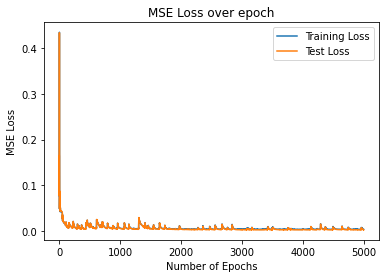

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,5000,5000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.9051497254246123
test_r2_score: 0.9310921657016993


In [ ]:
#large10, 0.01, 5000 epochs
training_r2_score: 0.9051497254246123
test_r2_score: 0.9310921657016993

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(10000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/10000, Loss={loss.item():.4f} ')

Epoch 25/10000, Loss=0.0029 
Epoch 50/10000, Loss=0.0025 
Epoch 75/10000, Loss=0.0024 
Epoch 100/10000, Loss=0.0024 
Epoch 125/10000, Loss=0.0024 
Epoch 150/10000, Loss=0.0024 
Epoch 175/10000, Loss=0.0025 
Epoch 200/10000, Loss=0.0024 
Epoch 225/10000, Loss=0.0024 
Epoch 250/10000, Loss=0.0024 
Epoch 275/10000, Loss=0.0033 
Epoch 300/10000, Loss=0.0034 
Epoch 325/10000, Loss=0.0028 
Epoch 350/10000, Loss=0.0026 
Epoch 375/10000, Loss=0.0024 
Epoch 400/10000, Loss=0.0023 
Epoch 425/10000, Loss=0.0023 
Epoch 450/10000, Loss=0.0023 
Epoch 475/10000, Loss=0.0023 
Epoch 500/10000, Loss=0.0023 
Epoch 525/10000, Loss=0.0024 
Epoch 550/10000, Loss=0.0023 
Epoch 575/10000, Loss=0.0023 
Epoch 600/10000, Loss=0.0024 
Epoch 625/10000, Loss=0.0023 
Epoch 650/10000, Loss=0.0023 
Epoch 675/10000, Loss=0.0023 
Epoch 700/10000, Loss=0.0024 
Epoch 725/10000, Loss=0.0031 
Epoch 750/10000, Loss=0.0025 
Epoch 775/10000, Loss=0.0024 
Epoch 800/10000, Loss=0.0024 
Epoch 825/10000, Loss=0.0023 
Epoch 850/100

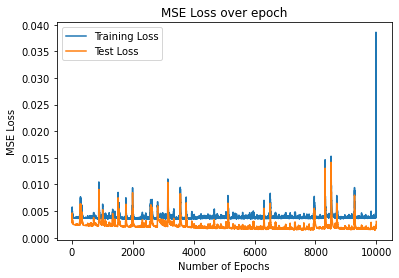

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,10000,10000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.873874836556653
test_r2_score: 0.9307468999046292


### learning rate = 0.1, 1000 epochs, 10 hidden layers



In [ ]:
model = MyNN()

learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

Epoch 25/100, Loss=2.2567 
Epoch 50/100, Loss=0.3829 
Epoch 75/100, Loss=0.0473 
Epoch 100/100, Loss=0.0428 
Epoch 125/100, Loss=0.0427 
Epoch 150/100, Loss=0.0425 
Epoch 175/100, Loss=0.0423 
Epoch 200/100, Loss=0.0421 
Epoch 225/100, Loss=0.0419 
Epoch 250/100, Loss=0.0418 
Epoch 275/100, Loss=0.0416 
Epoch 300/100, Loss=0.0414 
Epoch 325/100, Loss=0.0412 
Epoch 350/100, Loss=0.0410 
Epoch 375/100, Loss=0.0409 


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,200,200)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

### learning rate= 0.1, 1000 epochs, 5 hidden layers



In [ ]:
class SmallNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,100)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(100,100)
    self.linear3 = nn.Linear(100, 100)
    self.linear4 = nn.Linear(100,100)
    self.linear5 = nn.Linear(100,1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    x = self.activation(x)
    x = self.linear4(x)
    x = self.activation(x)
    x = self.linear5(x)
    return x
  

In [ ]:
model = SmallNN()

learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(200):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

Epoch 25/100, Loss=0.1817 
Epoch 50/100, Loss=0.0457 
Epoch 75/100, Loss=0.0434 
Epoch 100/100, Loss=0.0433 
Epoch 125/100, Loss=0.0432 
Epoch 150/100, Loss=0.0432 
Epoch 175/100, Loss=0.0432 
Epoch 200/100, Loss=0.0432 


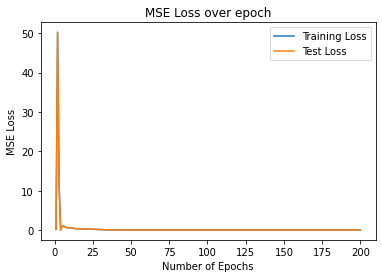

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,200,200)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: -4.954959525260705e-05
test_r2_score: -2.77364364809074e-08


### learning rate= 0.01, 1000 epochs, 5 hidden layers

In [ ]:
model = SmallNN()

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/100, Loss={loss.item():.4f} ')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1000,1000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

### Smaller NN with 3 hidden layers

In [ ]:
class SmallerNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,300)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(300,300)
    self.linear3 = nn.Linear(300, 1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    return x
  

In [ ]:
model = SmallerNN()

learning_rate = 0.05
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1000):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1000, Loss={loss.item():.4f} ')

Epoch 25/1000, Loss=2.4851 
Epoch 50/1000, Loss=0.1192 
Epoch 75/1000, Loss=0.0443 
Epoch 100/1000, Loss=0.0367 
Epoch 125/1000, Loss=0.0298 
Epoch 150/1000, Loss=0.0257 
Epoch 175/1000, Loss=0.0226 
Epoch 200/1000, Loss=0.0205 
Epoch 225/1000, Loss=0.0191 
Epoch 250/1000, Loss=0.0179 


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1000,1000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

* 
CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num_epochs = 1000
batch_size = 4
learning_rate = 0.001

In [ ]:
train_scaled_tensor = train_scaled_tensor.to(device)
test_scaled_tensor = test_scaled_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor =  y_test_tensor.to(device)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # Flatten 3d tensor to 1d tensor
    self.fc1 = nn.Linear(400, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 1)

  def forward(self, x):
    # conv + relu + pooling
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 400)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # No softmax as it will be included in CrossEntrooyLoss
    return out

In [ ]:
model = CNN().to(device)

# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)

criterion = nn.CrossEntropyLoss()

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)

import torch.optim as optim
opt = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #print(images.shape) # [4, 3, 32, 32] -> batch size, channels, img, dim
    images = images.to(device)
    labels = labels.to(device)

    # Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward Pass and Optimaze
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, iteration {i+1}/{n_iterations}, Loss = {loss.item():.4f}')

###smallest

In [ ]:
class SmallestNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(9,128)
    self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(128,128)
    self.linear3 = nn.Linear(128, 1)



  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation(x)
    x = self.linear3(x)
    return x
  

In [ ]:
model = SmallestNN()

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(500):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1000, Loss={loss.item():.4f} ')

Epoch 25/1000, Loss=0.0237 
Epoch 50/1000, Loss=0.0231 
Epoch 75/1000, Loss=0.0225 
Epoch 100/1000, Loss=0.0218 
Epoch 125/1000, Loss=0.0211 
Epoch 150/1000, Loss=0.0204 
Epoch 175/1000, Loss=0.0197 
Epoch 200/1000, Loss=0.0190 
Epoch 225/1000, Loss=0.0184 
Epoch 250/1000, Loss=0.0179 
Epoch 275/1000, Loss=0.0173 
Epoch 300/1000, Loss=0.0168 
Epoch 325/1000, Loss=0.0163 
Epoch 350/1000, Loss=0.0159 
Epoch 375/1000, Loss=0.0154 
Epoch 400/1000, Loss=0.0150 
Epoch 425/1000, Loss=0.0145 
Epoch 450/1000, Loss=0.0141 
Epoch 475/1000, Loss=0.0136 
Epoch 500/1000, Loss=0.0132 


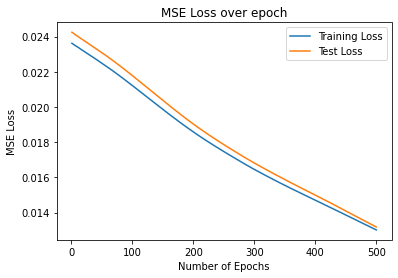

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,500,500)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.6932164999216968
test_r2_score: 0.6955217133272924


In [ ]:
0.05, smallest
training_r2_score: 0.8826445744739496
test_r2_score: 0.8983564037861

In [ ]:
## 2000 epochs

In [ ]:
training_loss=[]
test_loss = []

for epoch in range(1500):
  y_pred = model(train_scaled_tensor)
  loss = loss_fn(y_pred, y_train_tensor) 
  training_loss.append(loss.item())
  test_y_pred = model(test_scaled_tensor)
  loss = loss_fn(test_y_pred, y_test_tensor)
  test_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1500, Loss={loss.item():.4f} ')

Epoch 25/1500, Loss=0.0484 
Epoch 50/1500, Loss=0.0347 
Epoch 75/1500, Loss=0.0308 
Epoch 100/1500, Loss=0.0283 
Epoch 125/1500, Loss=0.0268 
Epoch 150/1500, Loss=0.0259 
Epoch 175/1500, Loss=0.0253 
Epoch 200/1500, Loss=0.0249 
Epoch 225/1500, Loss=0.0247 
Epoch 250/1500, Loss=0.0245 
Epoch 275/1500, Loss=0.0244 
Epoch 300/1500, Loss=0.0242 
Epoch 325/1500, Loss=0.0241 
Epoch 350/1500, Loss=0.0240 
Epoch 375/1500, Loss=0.0238 
Epoch 400/1500, Loss=0.0237 
Epoch 425/1500, Loss=0.0235 
Epoch 450/1500, Loss=0.0234 
Epoch 475/1500, Loss=0.0232 
Epoch 500/1500, Loss=0.0231 
Epoch 525/1500, Loss=0.0229 
Epoch 550/1500, Loss=0.0227 
Epoch 575/1500, Loss=0.0226 
Epoch 600/1500, Loss=0.0224 
Epoch 625/1500, Loss=0.0222 
Epoch 650/1500, Loss=0.0220 
Epoch 675/1500, Loss=0.0219 
Epoch 700/1500, Loss=0.0217 
Epoch 725/1500, Loss=0.0215 
Epoch 750/1500, Loss=0.0213 
Epoch 775/1500, Loss=0.0211 
Epoch 800/1500, Loss=0.0210 
Epoch 825/1500, Loss=0.0208 
Epoch 850/1500, Loss=0.0206 
Epoch 875/1500, L

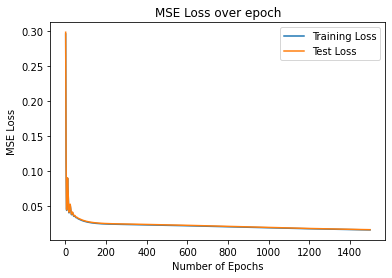

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1500,1500)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss, label='Training Loss')
plt.plot(x_range.tolist(), test_loss, label= 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model(train_scaled_tensor)
train_score = r2_score(y_train_tensor.detach(), y_pred.detach())
print(f'training_r2_score: {train_score}')
y_pred2 = model(test_scaled_tensor)
test_score = r2_score(y_test_tensor.detach(), y_pred2.detach())
print(f'test_r2_score: {test_score}')

training_r2_score: 0.6260889159304882
test_r2_score: 0.6260108426340394


## Inference 시간 측정

In [67]:
# inference 위한 가상 데이터
ko = pd.DataFrame(train_scaled)
ko.mean()

0   -4.620276e-17
1    4.837985e-19
2   -4.599109e-17
3   -3.664774e-16
4    4.777510e-17
5   -4.117730e-16
6   -2.211564e-16
7   -7.614535e-17
8   -9.057237e-17
dtype: float64

In [68]:
test = ko.mean().to_numpy()
test = test.reshape(1,9)
test

array([[-4.62027550e-17,  4.83798482e-19, -4.59910932e-17,
        -3.66477350e-16,  4.77751001e-17, -4.11772983e-16,
        -2.21156381e-16, -7.61453455e-17, -9.05723674e-17]])

In [69]:
import time
import numpy as np
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


start = time.time()
y_pred = lr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table = pd.DataFrame(columns = ['model', 'Time'])
time_table.loc[0] = ['Linear Regression', eval_time]
time_table

,model,Time
0,Linear Regression,0.00021


In [70]:
start = time.time()
y_pred = ridge.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[1] = ['Ridge', eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023


In [71]:
start = time.time()
y_pred = lasso.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[2] = ['Lasso',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020


In [72]:
start = time.time()
y_pred = dt.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[3] = ['Decision Tree',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031


In [73]:
start = time.time()
y_pred = forest.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[4] = ['Random Forest',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031
4,Random Forest,0.02567


In [74]:
start = time.time()
y_pred = gbr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[5] = ['GBR',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031
4,Random Forest,0.02567
5,GBR,0.00138


In [75]:
start = time.time()
y_pred = abr.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[6] = ['AdaBoost',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031
4,Random Forest,0.02567
5,GBR,0.00138
6,AdaBoost,0.00188


In [76]:
start = time.time()
y_pred = knn.predict(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[9] = ['KNN',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031
4,Random Forest,0.02567
5,GBR,0.00138
6,AdaBoost,0.00188
9,KNN,0.00322


In [77]:
test = torch.tensor(test, dtype=torch.float32)
test = test.to(device)

In [78]:
test

tensor([[-4.6203e-17,  4.8380e-19, -4.5991e-17, -3.6648e-16,  4.7775e-17,
         -4.1177e-16, -2.2116e-16, -7.6145e-17, -9.0572e-17]], device='cuda:0')

In [79]:
type(test)

torch.Tensor

In [80]:
start = time.time()
y_pred = model(test)
end = time.time()
eval_time = round(end-start,5)

time_table.loc[10] = ['DNN',eval_time]
time_table

,model,Time
0,Linear Regression,0.00021
1,Ridge,0.00023
2,Lasso,0.00020
3,Decision Tree,0.00031
4,Random Forest,0.02567
5,GBR,0.00138
6,AdaBoost,0.00188
9,KNN,0.00322
10,DNN,0.00405


In [81]:
time_table_copy = time_table.copy()
time_table_copy.columns  = ['Model', 'Time']

In [82]:
time_table_copy.index = time_table_copy['Model']
inference_time = pd.DataFrame(time_table_copy['Time']).T

In [83]:
inference_time

Model,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,GBR,AdaBoost,KNN,DNN
Time,0.00021,0.00023,0.0002,0.00031,0.02567,0.00138,0.00188,0.00322,0.00405


In [84]:
inference_time['Mean Time'] = inference_time.mean(axis = 1)
inference_time


Model,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,GBR,AdaBoost,KNN,DNN,Mean Time
Time,0.00021,0.00023,0.0002,0.00031,0.02567,0.00138,0.00188,0.00322,0.00405,0.004128


In [85]:
10/inference_time['Mean Time']

Time    2422.611036
Name: Mean Time, dtype: float64

In [86]:
10/inference_time['Decision Tree']

Time    32258.064516
Name: Decision Tree, dtype: float64

In [87]:
10/inference_time['GBR']

Time    7246.376812
Name: GBR, dtype: float64

## CNN with Keras

In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
train_scaled_tensor = torch.tensor(train_scaled_tensor, dtype = torch.float32)
test_scaled_tensor = torch.tensor(test_scaled_tensor, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_tensor, dtype = torch.float32)
y_test_tensor =  torch.tensor(y_test_tensor, dtype = torch.float32)


In [ ]:
train_scaled_tensor.shape

torch.Size([117494, 9])

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(9,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(scaled_X, y, batch_size=12,epochs=200, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 8, 32)             96        
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,609
Trainable params: 16,609
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: ignored

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['MAPE'])

In [ ]:
hist = model.fit(scaled_X, y, epochs = 100, validation_split = 0.3)

## Deep Learning Model(Keras) -- 사용안함


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_features_ohe)

scaled_X = ss.transform(X_features_ohe)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(5)

In [ ]:
model = Sequential()
model.add(layers.Dense(units= 14, input_shape=(9,), activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 14, activation = 'relu'))
model.add(layers.Dense(units= 1, activation = 'relu'))



In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['MAPE'])

In [ ]:
# model.compile(loss = 'mean_absolute_percentage_error', optimizer = 'adam', metrics= ['mean_absolute_percentage_error'])


In [ ]:
hist = model.fit(scaled_X, y, epochs = 100, validation_split = 0.3)

Epoch 1/100
3672/3672 [==============================] - 15s 4ms/step - loss: 0.0167 - MAPE: 30.0809 - val_loss: 0.0424 - val_MAPE: 90.2082
Epoch 2/100
3672/3672 [==============================] - 14s 4ms/step - loss: 0.0113 - MAPE: 27.8383 - val_loss: 0.3437 - val_MAPE: 229.6418
Epoch 3/100
3672/3672 [==============================] - 18s 5ms/step - loss: 0.0096 - MAPE: 26.7261 - val_loss: 0.4087 - val_MAPE: 242.9565
Epoch 4/100
3672/3672 [==============================] - 12s 3ms/step - loss: 0.0090 - MAPE: 25.8762 - val_loss: 0.3174 - val_MAPE: 216.9653
Epoch 5/100
3672/3672 [==============================] - 13s 3ms/step - loss: 0.0080 - MAPE: 25.0519 - val_loss: 0.2980 - val_MAPE: 212.3912
Epoch 6/100
3672/3672 [==============================] - 13s 4ms/step - loss: 0.0082 - MAPE: 25.1272 - val_loss: 0.1918 - val_MAPE: 165.0844
Epoch 7/100
3672/3672 [==============================] - 13s 3ms/step - loss: 0.0078 - MAPE: 25.0129 - val_loss: 0.1502 - val_MAPE: 149.5496
Epoch 8/100
36

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                140       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 14)                210       
                                                                 
 dense_4 (Dense)             (None, 14)                210       
                                                                 
 dense_5 (Dense)             (None, 14)                210       
                                                                 
 dense_6 (Dense)             (None, 14)                2

In [ ]:
# model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['RootMeanSquaredError'])

In [ ]:
# hist1 = model.fit(X_features_ohe, y, epochs = 10, validation_split = 0.3)

Epoch 1/10
3672/3672 [==============================] - 22s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 2/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 3/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 4/10
3672/3672 [==============================] - 21s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 5/10
3672/3672 [==============================] - 21s 6ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3335
Epoch 6/10
3672/3672 [==============================] - 19s 5ms/step - loss: 0.1548 - root_mean_squared_error: 0.3934 - val_l

In [ ]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize= (15,10))
  loss_ax = plt.gca()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label = 'test loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc = 'lower left')

  acc_ax.plot(hist.history['MAPE'], 'b', label = 'train MAPE')
  acc_ax.plot(hist.history['val_MAPE'], 'g', label = 'test MAPE')
  acc_ax.set_ylabel('MAPE')
  acc_ax.legend(loc = 'upper left')

  plt.show()

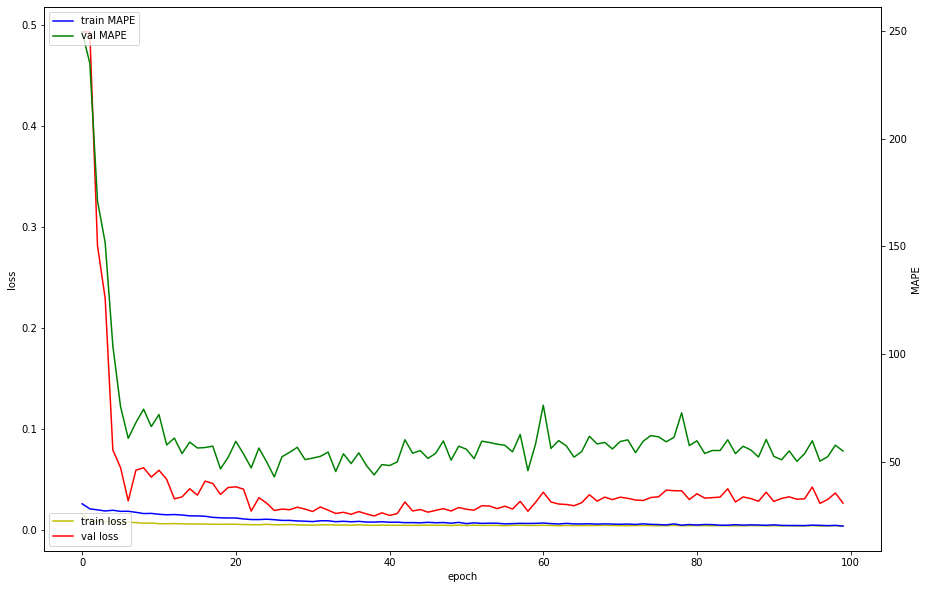

In [ ]:
drawHistory(hist)